**Import Libraries**

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime  # for time formating
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

import statsmodels.api  as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/surendra769/Econometrics-and-Finance/main/DailyDelhiClimateTest.csv')
df.head()


# we have the dataset from 1st Jamuary 2017 to 24  April 2017 

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


We will  take  date, mean pressure, humidity, wind_speed as train variable and mean temp as test variable.

In [4]:
df.info()  # need to convert date column to date data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [6]:
df = df[['date','meantemp']]
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


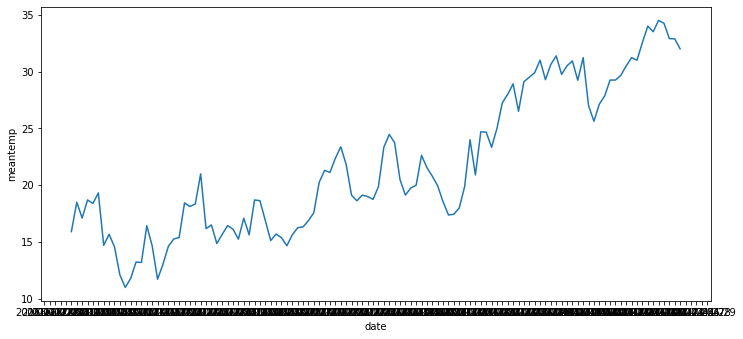

In [7]:
## plot the time series

plt.figure(figsize=(12,6))
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
sns.lineplot( df['date'],  df['meantemp'])
plt.gca().xaxis.set_major_locator(mdates.DayLocator());


Unable to see the date cearly  therefore we will change the range of date.

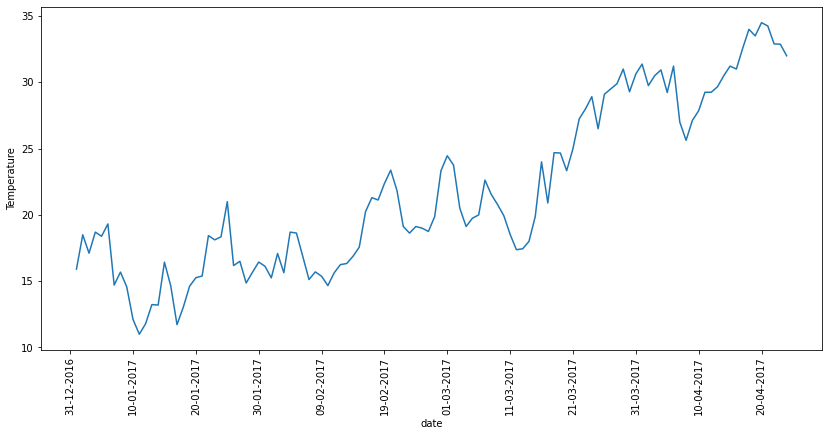

In [8]:
plt.figure(figsize = (14,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))     #specify the date foramt of  xaxis

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # specify  the interval
plt.gcf().autofmt_xdate()    # manage the space

sns.lineplot(df['date'], df['meantemp'])
plt.ylabel('Temperature')

plt.xticks(rotation=90)     # rotate the xaxis value by 90 degree
plt.show()

**Inference**: It is observed that over the month there is increase in temperature.

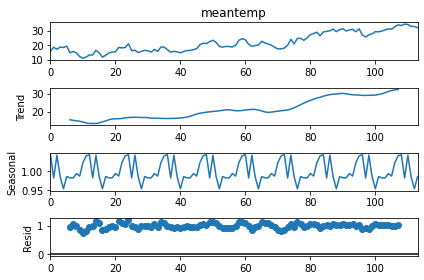

In [9]:
## to get  the better idea about trend, cyclical variation and  residuall
decomposition = sm.tsa.seasonal_decompose(df['meantemp'],period = 12, model = 'multiplicative' )
decomposition.plot()
plt.show()     # to get only one plot 

**Infernece**: we clearly see the upward trend in trend plpot alsoe see  the seasonal variation which  repeat each 20 days

In [10]:
## we will take 80-20 train test 

train = df.iloc[:int(df.shape[0]*0.80),]  
test = df.iloc[int(df.shape[0]*0.80):,]

In [11]:
test.shape

(23, 2)

### Baseline Model  
First we develop the baseline model and we only take that model which have accuracy greater than baseline model.  
To develop baseline model we can use mean method, mean of last value and naive seasonal method.  

**Naive Seasonal Method:** In the naive seasonal method  we take last seasonal value as predicted value, as we know that cycle  will  repeat so that will  be more closure value.


In [12]:
test.loc[:, 'pred_base'] = train['meantemp'][-23:].values

In [13]:
# function to  calcualte Mean Absolute Percentage Error
def MAPE(Y_actual,Y_Predicted):  
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [14]:
baseline_score = MAPE(test['pred_base'],test['meantemp'])
baseline_score

# our baseline model predicted value is deviate from 26% from the orgianal value, to better understand how the value are devaite we plot the value.

26.615061652611466

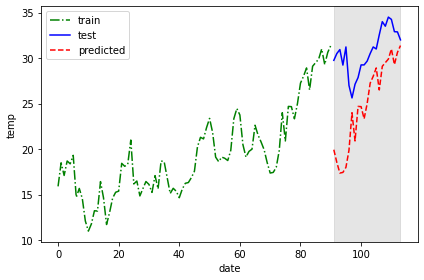

In [15]:
fig, ax = plt.subplots()

ax.plot(train['meantemp'], 'g-.' , label = 'train')
ax.plot(test['meantemp'], 'b-', label = 'test')
ax.plot(test['pred_base'], 'r--',label = 'predicted')
ax.axvspan(91, 113, color='#808080', alpha=0.2)   # give different color to predicted area
ax.set_xlabel('date')
ax.set_ylabel('temp')
ax.legend(loc=2)
#fig.automft_xdate()  # fit xtick value automatically
plt.tight_layout()

In [16]:
test.tail()

,date,meantemp,pred_base
109,2017-04-20,34.500,29.888889
110,2017-04-21,34.250,31.000000
111,2017-04-22,32.900,29.285714
112,2017-04-23,32.875,30.625000
113,2017-04-24,32.000,31.375000


## Statistical Time-Series

### MA (Moving Average)
 A moving average process, or the moving average model, states that the current value is linearly dependent on the current and past error terms. Again, the error terms are assumed to be mutually independent and normally distributed, just like white noise.  
1) To apply MA model, series should stationary.  
2) Order of moving average is determined by ACF plot, order is that value after which lag come under the critical value.  



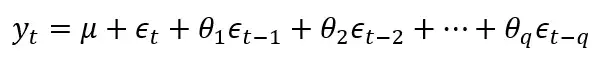

**Augmented Dicker Fuller Test(ADF)** for checking the stationarity of series.  

Null hypothesis: Series is non Stationary  
Alternative hypothesis: Series is Stationary


In [17]:
adf_test = adfuller(df['meantemp'])

print('{} is a statistic value'.format(adf_test[0]))
print('{} is a p value'.format(adf_test[1]))

-1.096474275875619 is a statistic value
0.7164758731775932 is a p value


**Inference**: As p_value of test is greater than 0.05(alpa value) therefore we are fail to reject the null hypohtesis and conclude that sereis is not stationary and trend is present in sereis.

In [18]:
## remove the trend by differcing  
df['diff_temp'] = np.diff(df['meantemp'], n = 1,prepend = df['meantemp'][1])    # without prepend we get one value less as it value start from 2nd value -1 value of column

# again adf test
adf_test = adfuller(df['diff_temp'])


print('{} is a statistic value'.format(adf_test[0]))
print('{} is a p value'.format(adf_test[1]))
## as p value is less than 0.05 therefore we reject the null  hypothesis

-12.334379916007231 is a statistic value
6.32139424982012e-23 is a p value


####  ACF(Autocorrelation Function) Plot  
Correlation between time series with a lagged version of itself. The correlation between the observation at the current time spot and the observations at previous time spots.The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.


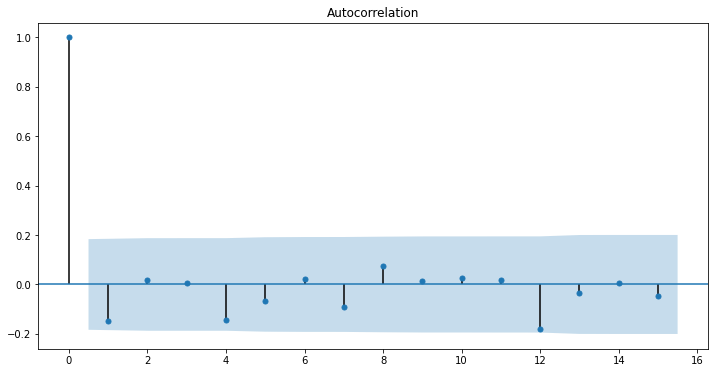

In [19]:
plt.rc("figure", figsize=(12,6))
adf_plot = plot_acf(df['diff_temp'], lags = 15)
adf_plot.show();

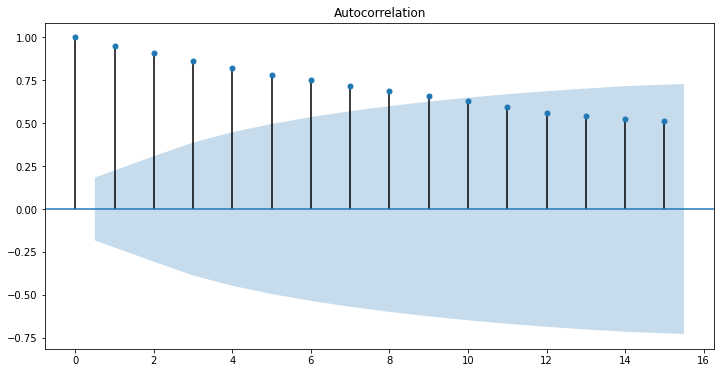

In [20]:
# plot of non stationary
plt.rc("figure", figsize=(12,6))
adf_plot = plot_acf(df['meantemp'], lags = 15)
adf_plot.show();

**Inference**: we can clearly see the difference between acf plot of stationary  and  non stationary series.  

As in stationary plot all lag fall under critical value therefore this is case random walk  
but for practice we will take lag value 2  
order 2 means to  predict current value we take consideration of last two error  value: yt = mean + et + q1et-1 + q2et-2

#### AR Model 
To develop the MA model  we take  ARMA or ARIMA by giving other variable order as 0

In [21]:
df.head()

,date,meantemp,diff_temp
0,2017-01-01,15.913043,-2.586957
1,2017-01-02,18.500000,2.586957
2,2017-01-03,17.111111,-1.388889
3,2017-01-04,18.700000,1.588889
4,2017-01-05,18.388889,-0.311111


In [22]:
## we will take 80-20 train test 

train_ma = df.iloc[:int(df.shape[0]*0.80),]    # earlier train, test dont have diff variable  train, test
test_ma = df.iloc[int(df.shape[0]*0.80):,]

In [33]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

ma_model = SARIMAX(train_ma['diff_temp'], order=(0,0,2), simple_differencing=False).fit(disp=False)  # order is p,d,q

#ar_model = ARMA(endog = train_ma['diff_temp'], order = (0,2)).fit()
print(ma_model.summary()) 

                               SARIMAX Results                                
Dep. Variable:              diff_temp   No. Observations:                   91
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -180.194
Date:                Sat, 24 Dec 2022   AIC                            366.387
Time:                        14:20:13   BIC                            373.920
Sample:                             0   HQIC                           369.426
                                 - 91                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1329      0.110     -1.209      0.227      -0.348       0.083
ma.L2          0.0289      0.111      0.259      0.795      -0.190       0.247
sigma2         3.0717      0.456      6.737      0.0

Inference: The two parameter are q1 and q2, number of lag is  equal to number of parameter and there is constant.  

Equation: yt = 0.14 -0.143et-1 + 0.015et-2

In [24]:
## prediction
## again back to orgianl value
## plot

In [ ]:
ma = pd.DataFrame(ma_model.forecast(23))  # forecaast 23 value
#ma
ma.columns = ['ma_pred']
ma

In [42]:
ma.head()

,ma_pred
91,-0.093377
92,0.027213
93,0.000000
94,0.000000
95,0.000000


In [45]:
test_ma = test_ma.join(ma['ma_pred'])              # prediction  is on scale on differcing so we compare to diff_temp

In [46]:
test_ma.head()

,date,meantemp,diff_temp,ma_pred
91,2017-04-02,29.750000,-1.625000,-0.093377
92,2017-04-03,30.500000,0.750000,0.027213
93,2017-04-04,30.933333,0.433333,0.000000
94,2017-04-05,29.230769,-1.702564,0.000000
95,2017-04-06,31.222222,1.991453,0.000000


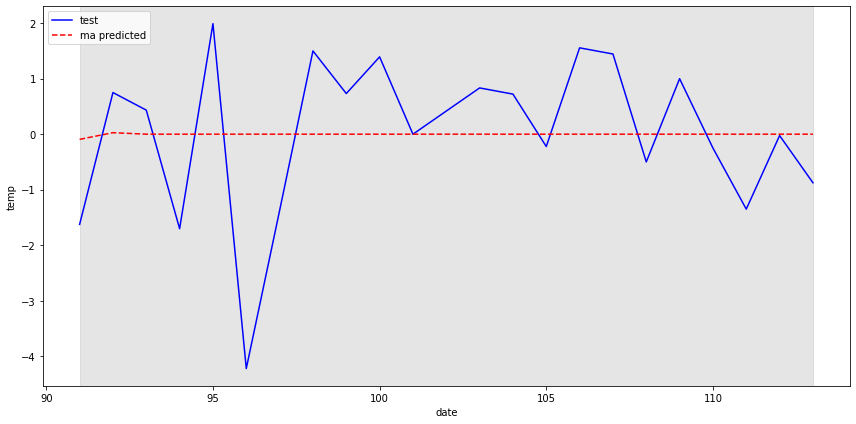

In [49]:
fig, ax = plt.subplots()
#ax.plot(train['meantemp'], 'g-.' , label = 'train')
ax.plot(test_ma['diff_temp'], 'b-', label = 'test')
ax.plot(test_ma['ma_pred'], 'r--',label = 'ma predicted')
ax.axvspan(91, 113, color='#808080', alpha=0.2)   # give different color to predicted area
ax.set_xlabel('date')
ax.set_ylabel('temp')
ax.legend(loc=2)
#fig.automft_xdate()  # fit xtick value automatically
plt.tight_layout()

In [52]:
mape = MAPE(test_ma['diff_temp'], test_ma['ma_pred'])   # due to +,- unable to calculate the MAPE
print("MAPE: ", mape) 


MAPE:  99.57388083419431


In [53]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test_ma['diff_temp'], test_ma['ma_pred'])
RMSE = np.sqrt(MSE)

print("Root Mean Square Error", RMSE)

Root Mean Square Error 1.3864407679088668


### Auto Regression(AR): 
An autoregressive (AR) model predicts future behavior based on past behavior. It’s used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them. You only use past data to model the behavior, hence the name autoregressive (the Greek prefix auto– means “self.” ). The process is basically a linear regression of the data in the current series against one or more past values in the same series. 

1) series should be stationary before applying AR  
2) PACF is used to find the order(p)   
3)Present value is linearly  dependent on past value

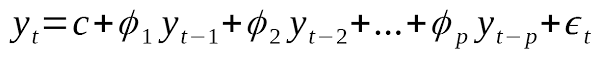

### PACF Partial autocorrelation
Partial autocorrelation is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables. For example, if we’re regressing a signal S at lag t (S_{t}) with the same signal at lags t-1, t-2 and t-3 (S_{t-1}, S_{t-2}, S_{t-3}), the partial correlation between S_{t} and S_{t-3} is the amount of correlation between S_{t} and S_{t-3} that isn’t explained by their mutual correlations with S_{t-1} and S_{t-2}.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf_plot = plot_pacf(df['diff_temp'], lags = 15)
pacf_plot.show()

**Inference:** only  the one 12 lag is highly  correlated but that can be ignored and here also we take order as 2

### AR Model: To develop the MA model  we take  ARMA or ARIMA by giving other variable order as 0

In [54]:
ar_model = SARIMAX(train_ma['diff_temp'], order=(2,0,0), simple_differencing=False).fit(disp=False)  # order is p,d,q

#ar_model = ARMA(endog = train_ma['diff_temp'], order = (0,2)).fit()
print(ar_model.summary()) 

                               SARIMAX Results                                
Dep. Variable:              diff_temp   No. Observations:                   91
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -180.174
Date:                Sat, 24 Dec 2022   AIC                            366.349
Time:                        14:32:28   BIC                            373.882
Sample:                             0   HQIC                           369.388
                                 - 91                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1356      0.110     -1.235      0.217      -0.351       0.080
ar.L2          0.0172      0.122      0.141      0.888      -0.222       0.256
sigma2         3.0703      0.457      6.725      0.0

Inference: The two parameter are q1 and q2, number of lag is equal to number of parameter and there is constant.

Equation: yt = 0.1446 -0.1452yt-1 + 0.009yt-2

In [ ]:
ar = pd.DataFrame(ar_model.forecast(23))  # forecaast 23 value
#ma
ar.columns = ['ar_pred']
ar

In [57]:
test_ma = test_ma.join(ar['ar_pred'])              # prediction  is on scale on differcing so we compare to diff_temp

In [ ]:
test_ma

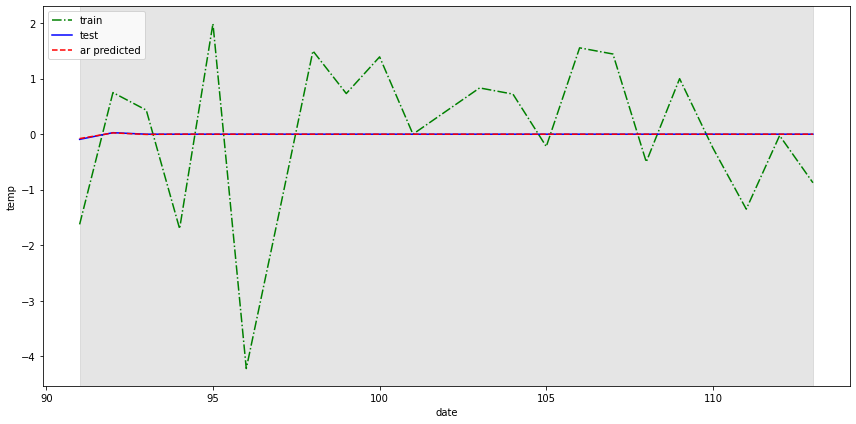

In [64]:
fig, ax = plt.subplots()
ax.plot(test_ma['diff_temp'], 'g-.' , label = 'train')
ax.plot(test_ma['ma_pred'], 'b-', label = 'test')
ax.plot(test_ma['ar_pred'], 'r--',label = 'ar predicted')
ax.axvspan(91, 113, color='#808080', alpha=0.2)   # give different color to predicted area
ax.set_xlabel('date')
ax.set_ylabel('temp')
ax.legend(loc=2)
#fig.automft_xdate()  # fit xtick value automatically
plt.tight_layout()

In [61]:
mape = MAPE(test_ma['diff_temp'], test_ma['ar_pred'])   # due to +,- unable to calculate the MAPE
print("MAPE: ", mape) 


MAPE:  inf


In [62]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test_ma['diff_temp'], test_ma['ar_pred'])
RMSE = np.sqrt(MSE)

print("Root Mean Square Error", RMSE)

Root Mean Square Error 1.387368766983388
